In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.figures.figure3A import gseaplot_EGFRres_signature
from msresist.pre_processing import preprocessing
from msresist.clustering import DDMC

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
# Load data
X = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

# Fit DDMC
ddmc = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)

/home/creixell/AXLomics/msresist/pre_processing.py:121: FutureWarning: The provided callable <function mean at 0x7f6e203f49a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(X, values=values, index=indices, aggfunc=np.mean)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function mean at 0x7f6e203f49a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  X = pd.pivot_table(triplicates, values=triplicates[data_headers].columns, index=merging_indices, aggfunc=func_tri)
/home/creixell/AXLomics/msresist/pre_processing.py:284: FutureWarning: The provided callable <function std at 0x7f6e203f4ae0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided 

2025-08-07 08:46:57,744 [INFO] Parsing data files for GSEA.............................
2025-08-07 08:46:57,746 [INFO] Enrichr library gene sets already downloaded in: /home/creixell/.cache/gseapy, use local file
2025-08-07 08:46:57,759 [INFO] 0505 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-08-07 08:46:57,760 [INFO] 0117 gene_sets used for further statistical testing.....
2025-08-07 08:46:57,760 [INFO] Start to run GSEA...Might take a while..................
2025-08-07 08:46:58,014 [INFO] Congratulations. GSEApy runs successfully................



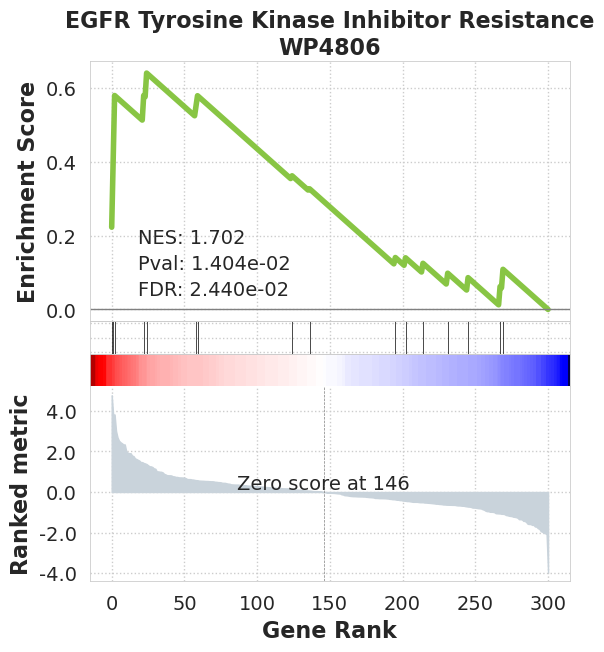

In [4]:
gseaplot_EGFRres_signature(X, ddmc)
plt.savefig("/home/creixell/AXLomics/msresist/out/plots/Figure3A_EGFRres_signature.svg", bbox_inches='tight')